In [4]:
from database_handler import create_connection, return_query_as_df, close_connection
import matplotlib.pyplot as plt
import pandas as pd

# RENTAL DIFFERENCE

- Rental Difference = Number of DVD Rentals (Current Day) - Number of DVD Rentals (Previous Day).
- The "rental difference" for a DVD rental store refers to the change in the number of DVD rentals between the current day and the previous day.

In [15]:
db_session = create_connection()
query = """ 
    SELECT 
        rental_day,
        rental_difference
    FROM reporting_schema.aggregate_daily
    ORDER BY rental_day
"""
df = return_query_as_df(db_session= db_session, query= query)

c:\Users\User\Desktop\SQL_Pandas\W4_2_ETL_Project\ETL_Project\database_handler.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


In [16]:
# Convert the 'daily_date' column to datetime format
df['rental_day'] = pd.to_datetime(df['rental_day']) #converts the 'rental_day' column in the DataFrame df to datetime objects. It uses the 

# Function to add day name to date
def add_day_name(date):
    day_name = date.strftime("%A") # strftime method to extract the day name from the datetime object. The "%A" format specifier is used to get the full name of the day (e.g., "Monday").
    return f"{day_name}, {date}" # This line combines the day name and the original date to create a formatted string. 

# Apply the function to 'daily_date' column
df['formatted_date'] = df['rental_day'].apply(add_day_name)

# Print the modified DataFrame
print(df)

   rental_day  rental_difference                  formatted_date
0  2005-05-24                0.0    Tuesday, 2005-05-24 00:00:00
1  2005-05-25              129.0  Wednesday, 2005-05-25 00:00:00
2  2005-05-26               37.0   Thursday, 2005-05-26 00:00:00
3  2005-05-27               -8.0     Friday, 2005-05-27 00:00:00
4  2005-05-28               30.0   Saturday, 2005-05-28 00:00:00
5  2005-05-29              -42.0     Sunday, 2005-05-29 00:00:00
6  2005-05-30                4.0     Monday, 2005-05-30 00:00:00
7  2005-05-31                5.0    Tuesday, 2005-05-31 00:00:00
8  2005-06-14             -147.0    Tuesday, 2005-06-14 00:00:00
9  2005-06-15              332.0  Wednesday, 2005-06-15 00:00:00
10 2005-06-16              -24.0   Thursday, 2005-06-16 00:00:00
11 2005-06-17                1.0     Friday, 2005-06-17 00:00:00
12 2005-06-18               19.0   Saturday, 2005-06-18 00:00:00
13 2005-06-19                4.0     Sunday, 2005-06-19 00:00:00
14 2005-06-20            

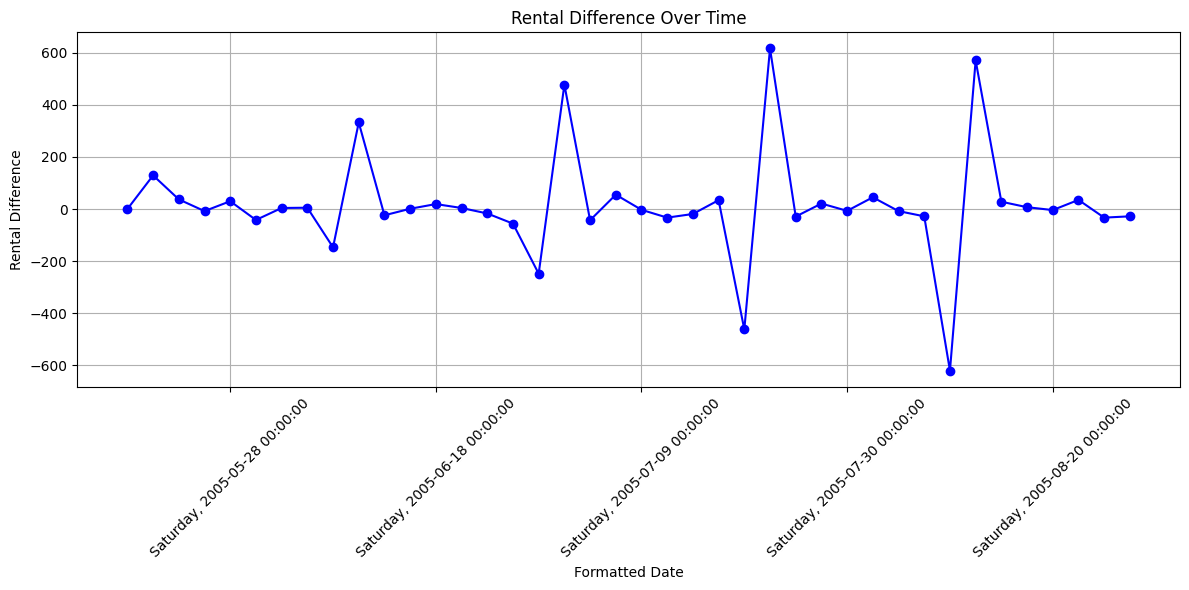

In [17]:
plt.figure(figsize=(12, 6))  # Set the figure size

plt.plot(df['formatted_date'], df['rental_difference'], marker='o', linestyle='-', color='blue')

# Customize the plot
plt.title('Rental Difference Over Time')
plt.xlabel('Formatted Date')
plt.ylabel('Rental Difference')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add grid
plt.grid(True)

# Filter Saturdays' dates
saturdays = df[df['rental_day'].dt.weekday == 5]['formatted_date']

# Set x-axis ticks to Saturdays' dates
plt.xticks(saturdays, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

- **Peak Demand on Saturdays:** Saturdays appear to be the busiest day of the week for DVD rentals. Customers may have more free time on weekends, leading to increased demand for entertainment.
<br>
<br>
- Given the higher demand on Saturdays, consider running promotions, special events, or marketing campaigns on Saturdays to further capitalize on this peak day.
- Optimize Inventory on Saturdays: Ensure that your DVD inventory is well-stocked on Saturdays to meet the increased demand. Consider adding extra copies of popular titles during weekends to prevent stockouts.
- Engage with customers on Saturdays through social media, email newsletters, or SMS notifications to inform them about special Saturday-only offers or promotions.
- We can offer weekday discounts (discount of 10% or 20%) and weekday deals (-one-get-one-free) because this will make them more affordable and encourage people to rent them during this time.

# TOTAL REVENUE

In [19]:
db_session = create_connection()
query = """ 
    SELECT 
        rental_day,
        total_revenue
    FROM reporting_schema.aggregate_daily
    ORDER BY rental_day
"""
query_df = return_query_as_df(db_session= db_session, query= query)

c:\Users\User\Desktop\SQL_Pandas\W4_2_ETL_Project\ETL_Project\database_handler.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


In [20]:
df = query_df

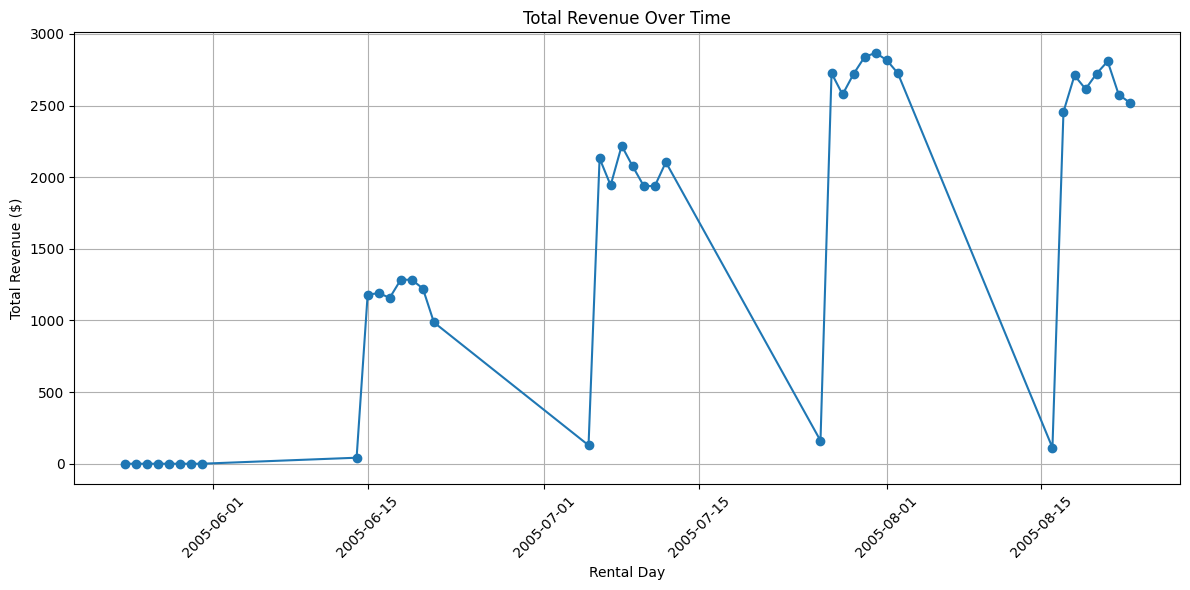

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(df['rental_day'], df['total_revenue'], marker='o', linestyle='-')
plt.title('Total Revenue Over Time')
plt.xlabel('Rental Day')
plt.ylabel('Total Revenue ($)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# MAX and MIN PAID AMOUNT

In [86]:
db_session = create_connection()
query = """ 
    SELECT 
        rental_day,
        max_paid_amount,
        min_paid_amount
    FROM reporting_schema.aggregate_daily
    ORDER BY rental_day
"""
df = return_query_as_df(db_session= db_session, query= query)

c:\Users\User\Desktop\SQL_Pandas\ETL+matplotlib\ETL_Project\database_handler.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


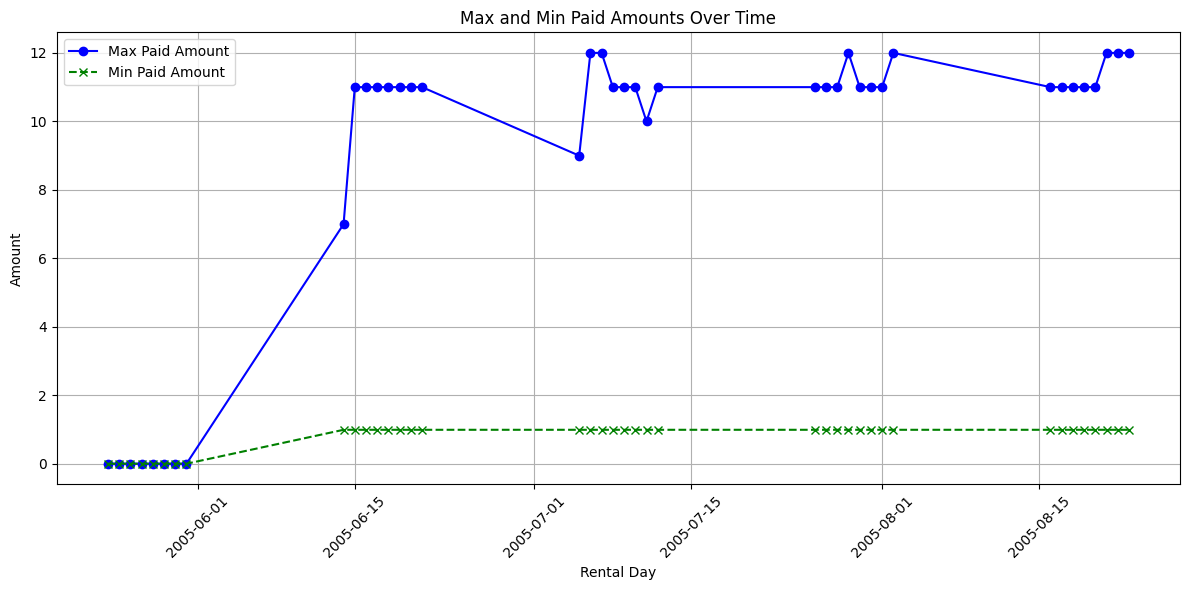

In [89]:
# Assuming you have already loaded the data and converted the 'rental_day' column to a datetime object
df['rental_day'] = pd.to_datetime(df['rental_day'])

plt.figure(figsize=(12, 6))
plt.plot(df['rental_day'], df['max_paid_amount'], label='Max Paid Amount', marker='o', linestyle='-', color='blue')
plt.plot(df['rental_day'], df['min_paid_amount'], label='Min Paid Amount', marker='x', linestyle='--', color='green')

plt.title('Max and Min Paid Amounts Over Time')
plt.xlabel('Rental Day')
plt.ylabel('Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

- The price range for DVD rentals is between $1 and $12.
- A price range of $1 to $12 is likely to be considered very affordable for most individuals. At the lower end of this range ($1), you can find DVDs to rent at an extremely low cost, making it accessible to a wide range of consumers.
- Prior to June 14, 2005, there were no rental charges (both max_paid_amount and min_paid_amount were 0), indicating that rentals may have been free or or had not yet been paid. 
- The max_paid_amount column shows fluctuations over time.
- The min_paid_amount column remains constant at 0.99 after June 14, 2005, indicating that this became the minimum charge for rentals.

# Rental duration

In [133]:
db_session = create_connection()
query = """ 
    SELECT 
        rental_day,
        avg_rental_duration,
        returned_on_time,
        late_returns,
        percentage_late_returns
    FROM reporting_schema.aggregate_daily
    ORDER BY rental_day
"""
df = return_query_as_df(db_session= db_session, query= query)

c:\Users\User\Desktop\SQL_Pandas\W4_2_ETL_Project\ETL_Project\database_handler.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


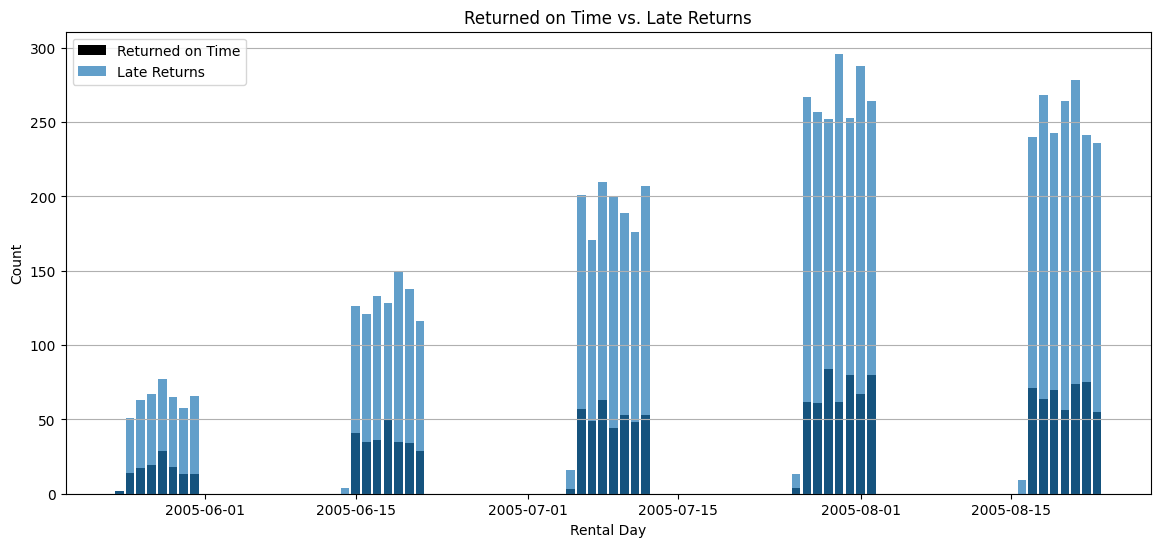

In [134]:
# Bar Chart
plt.figure(figsize=(14, 6))
plt.bar(df['rental_day'], df['returned_on_time'], label='Returned on Time', alpha=1, color = 'black')
plt.bar(df['rental_day'], df['late_returns'], label='Late Returns', alpha=0.7) #alpha = 1 not transperant 
plt.xlabel('Rental Day')
plt.ylabel('Count')
plt.title('Returned on Time vs. Late Returns')
plt.legend()
plt.grid(axis='y')

- The histogram shows a higher frequency of "Late Returns" compared to "Returned on Time." This suggests that late returns are more common in our shop.
- We need to understand the factors that contribute to late returns, possible reasons for late returns could include customer habits, operational issues, or other factors.
- Consider implementing strategies to reduce late returns, such as setting clear return policies, sending reminders to customers, or optimizing rental pick-up and drop-off locations.

# MOST RENTED CATEGORIES

In [115]:
db_session = create_connection()
query = """ 
    SELECT
        most_rented_category,
        COUNT(most_rented_category) AS times_as_most_rented_category,
        SUM(total_rentals_per_cat) AS total_rentals
    FROM reporting_schema.aggregate_daily
    GROUP BY
        most_rented_category
    ORDER BY
        times_as_most_rented_category DESC,
         total_rentals DESC;
"""
df = return_query_as_df(db_session= db_session, query= query)

c:\Users\User\Desktop\SQL_Pandas\W4_2_ETL_Project\ETL_Project\database_handler.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


In [116]:
df

,most_rented_category,times_as_most_rented_category,total_rentals
0,Action,5,187
1,Foreign,5,180
2,Animation,5,170
3,Sci-Fi,5,146
4,Sports,4,172
5,Documentary,4,154
6,Drama,4,139
7,Family,3,157
8,Games,3,55
9,New,1,3


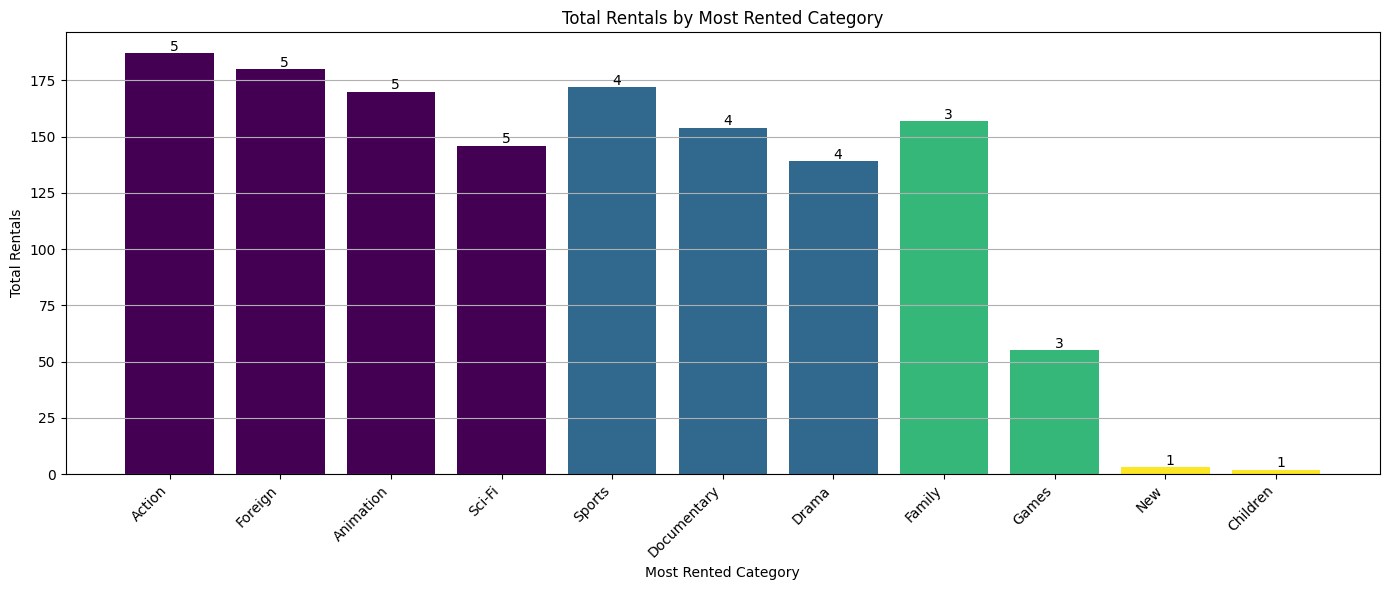

In [117]:
import numpy as np
# Create a color map to assign unique colors to each 'times_as_most_rented_category' value
color_map = {}
unique_categories = df['times_as_most_rented_category'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_categories)))

for i, category in enumerate(unique_categories):
    color_map[category] = colors[i]

# Create a bar chart
plt.figure(figsize=(14, 6))
colors = [color_map[category] for category in df['times_as_most_rented_category']]
plt.bar(df['most_rented_category'], df['total_rentals'], color=colors)
plt.xlabel('Most Rented Category')
plt.ylabel('Total Rentals')
plt.title('Total Rentals by Most Rented Category')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Add text labels for 'times_as_most_rented_category' above the bars
# A loop is used to iterate through the 'times_as_most_rented_category' values and add them as text labels above the bars.
#i represents the index of the current bar.
#df['total_rentals'].iloc[i] + 10 positions the text label slightly above each bar.
#ha='center' aligns the text labels to the center of each bar.
#va='bottom' aligns the text labels at the bottom
for i, value in enumerate(df['times_as_most_rented_category']):
    plt.text(i, df['total_rentals'].iloc[i] + 1, str(value))

plt.tight_layout()
plt.grid(axis='y')
plt.show()


- We can identify the most popular movie categories per day among our customers. In this dataset, Action, Foreign, Animation, and Sci-Fi are the most popular categories per day.
- We can allocate more marketing efforts towards the most popular categories (Action, Foreign...) as they generate the highest rental demand.
- Ensure that we have a well-stocked inventory for the most popular categories to meet customer demand. Consider expanding our collection in these categories.

# Least RENTED CATEGORIES

In [118]:
db_session = create_connection()
query = """ 
    SELECT
        least_rented_category,
        COUNT(least_rented_category) AS times_as_least_rented_category,
        SUM(total_rentals_per_least_cat) AS total_rentals
    FROM reporting_schema.aggregate_daily
    GROUP BY
        least_rented_category
    ORDER BY
        times_as_least_rented_category DESC,
        total_rentals DESC;
"""
df = return_query_as_df(db_session= db_session, query= query)

c:\Users\User\Desktop\SQL_Pandas\W4_2_ETL_Project\ETL_Project\database_handler.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


In [119]:
df

,least_rented_category,times_as_least_rented_category,total_rentals
0,Music,7,147
1,Horror,7,143
2,Travel,5,72
3,New,5,41
4,Comedy,4,74
5,Classics,4,43
6,Children,2,45
7,Foreign,2,19
8,Games,1,28
9,Action,1,22


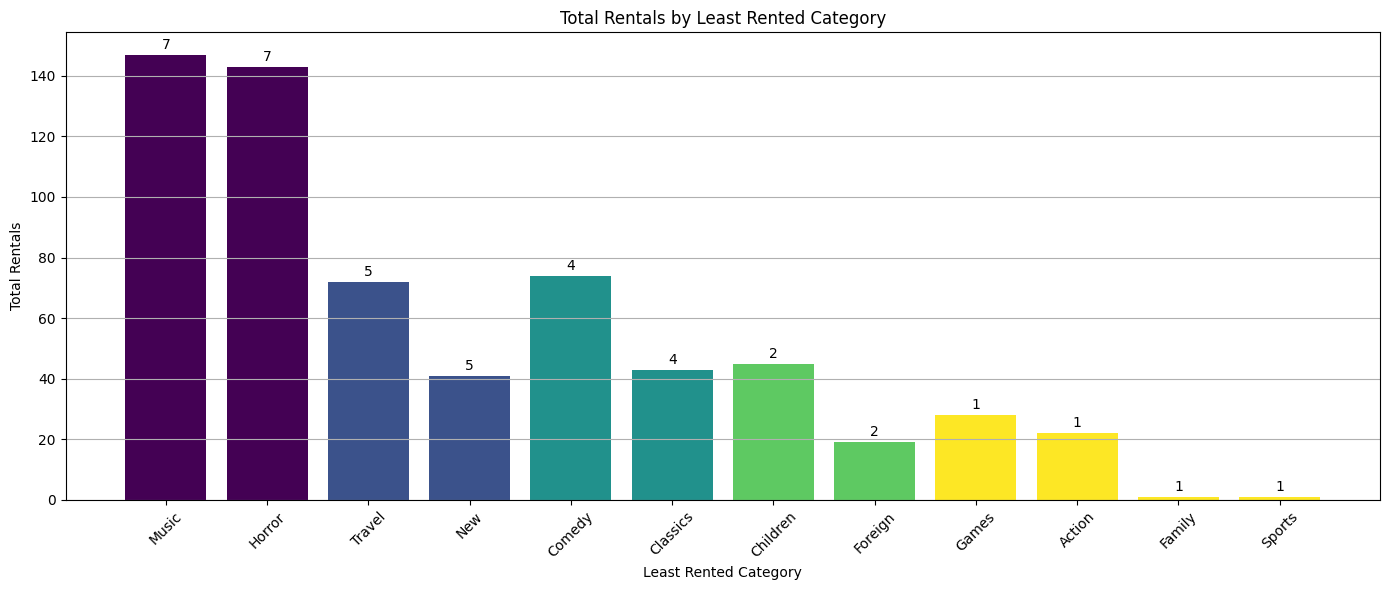

In [120]:
# Create a color map to assign unique colors to each 'times_as_most_rented_category' value
color_map = {}
unique_categories = df['times_as_least_rented_category'].unique()
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_categories))) #Generates an array of colors using the Viridis colormap from Matplotlib. The np.linspace(0, 1, len(unique_categories))
#part ensures that you get a range of colors based on the number of unique categories.

#This loop associates each unique category with a color and stores the mapping in the color_map dictionary.
for i, category in enumerate(unique_categories):
    color_map[category] = colors[i]

# Create a bar chart
plt.figure(figsize=(14, 6))
# Assigns colors to each category in the DataFrame based on the color_map.
colors = [color_map[category] for category in df['times_as_least_rented_category']]
plt.bar(df['least_rented_category'], df['total_rentals'], color=colors)
plt.xlabel('Least Rented Category')
plt.ylabel('Total Rentals')
plt.title('Total Rentals by Least Rented Category')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Add text labels for 'times_as_most_rented_category' above the bars
# A loop is used to iterate through the 'times_as_most_rented_category' values and add them as text labels above the bars.
#i represents the index of the current bar.
#df['total_rentals'].iloc[i] + 10 positions the text label slightly above each bar.
#ha='center' aligns the text labels to the center of each bar.
#va='bottom' aligns the text labels at the bottom
# Add text labels for 'times_as_most_rented_category' above the bars
for i, value in enumerate(df['times_as_least_rented_category']):
    plt.text(i, df['total_rentals'].iloc[i] + 1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.grid(axis='y')
plt.show()


- We can identify the least popular movie categories among our customers. In this dataset, Calssics and New are among the least popular categories.
- We  may consider reducing the inventory or shelf space allocated to these categories to free up resources for more popular ones.
- To increase rentals for the least popular categories, consider running promotional campaigns, discounts, or bundle deals. 
- Collect feedback from customers to understand why these categories are less popular

# MOST RENTED RATING

In [121]:
db_session = create_connection()
query = """ 
    SELECT
        most_rented_rating,
        COUNT(most_rented_rating) AS times_as_most_rented_rating,
        SUM(rentals_per_rating) AS total_rentals
    FROM reporting_schema.aggregate_daily
    GROUP BY
        most_rented_rating
    ORDER BY
        times_as_most_rented_rating DESC,
        total_rentals DESC;
"""
df = return_query_as_df(db_session= db_session, query= query)

c:\Users\User\Desktop\SQL_Pandas\W4_2_ETL_Project\ETL_Project\database_handler.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


In [122]:
df

,most_rented_rating,times_as_most_rented_rating,total_rentals
0,PG-13,22,2403
1,NC-17,7,608
2,PG,6,348
3,R,4,311
4,G,1,3


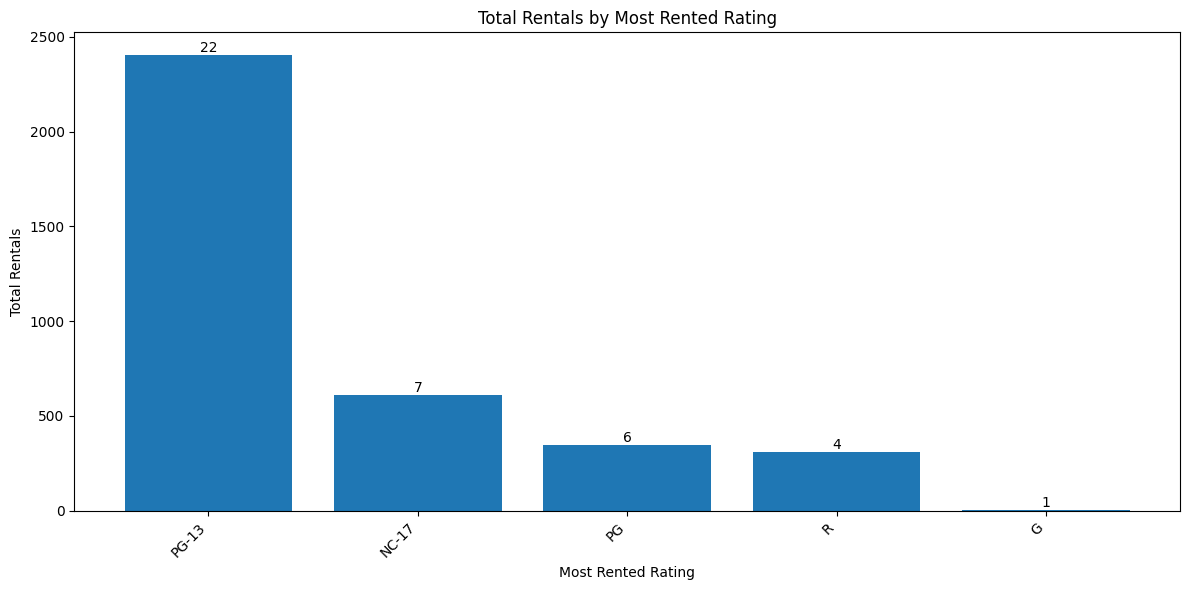

In [123]:
# Create a bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['most_rented_rating'], df['total_rentals']) 
plt.xlabel('Most Rented Rating')
plt.ylabel('Total Rentals')
plt.title('Total Rentals by Most Rented Rating')
plt.xticks(rotation=45, ha='right')

# Add text labels for 'times_as_most_rented_rating' above the bars
for i, value in enumerate(df['times_as_most_rented_rating']):
    plt.text(i, df['total_rentals'].iloc[i] + 1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


- PG-13 is the most rented rating and has been the most rented rating 22 times.
- G is the least rented rating, with only 1 rental
- PG-13 movies are the most popular, so make sure we have a lot of them in stock.
- We should have a good selection of PG-13 movies from different genres so that everyone can find something they like.
- Highlight the most popular movies, especially PG-13 movies, in our marketing materials.

# CITIES WITH MOST CUSTOMERS

In [124]:
db_session = create_connection()
query = """ 
    SELECT
        city_with_most_customers,
        COUNT(city_with_most_customers) AS times_as_city_with_most_customers
    FROM reporting_schema.aggregate_daily
    GROUP BY
        city_with_most_customers
    ORDER BY
        city_with_most_customers;
"""
df = return_query_as_df(db_session= db_session, query= query)

c:\Users\User\Desktop\SQL_Pandas\W4_2_ETL_Project\ETL_Project\database_handler.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


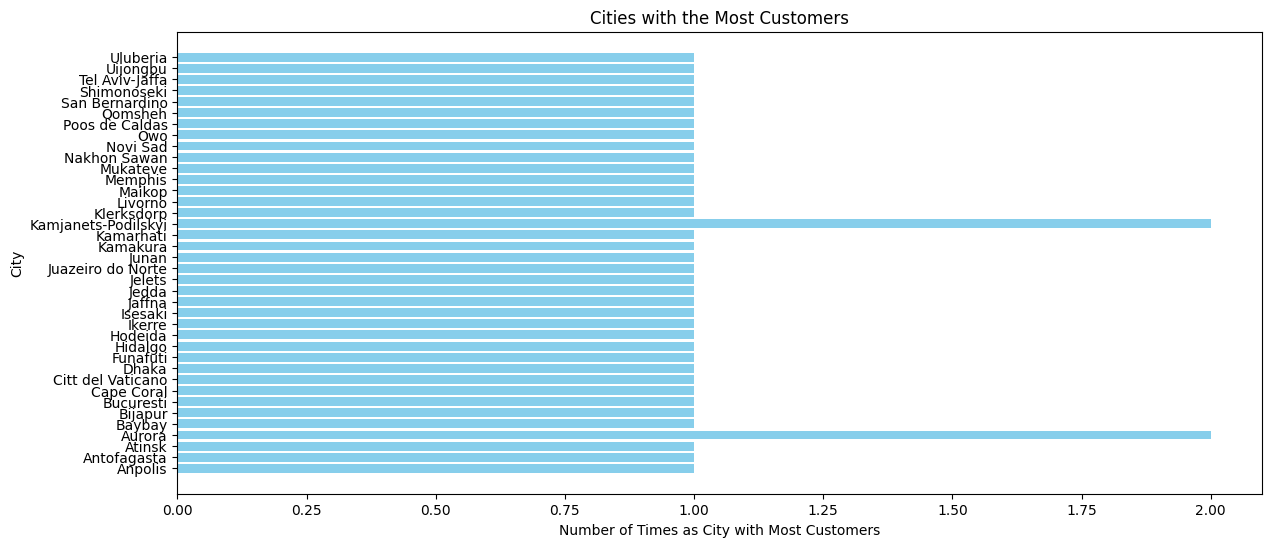

In [125]:
# Create a bar plot
plt.figure(figsize=(14,6))
plt.barh(df['city_with_most_customers'], df['times_as_city_with_most_customers'], color='skyblue')
plt.xlabel('Number of Times as City with Most Customers')
plt.ylabel('City')
plt.title('Cities with the Most Customers')
plt.show()

- There are 36 cities in the dataset that had the most customers only once.
- There are 2 cities in the dataset that had the most customers twice.
- The business has a diverse customer base, as evidenced by the cities in the dataset.
- The cities in the dataset show that the business is not limited to a specific region.
- The business has a large customer base in many different cities.

## CUSTOMERS

In [126]:
db_session = create_connection()
query = """ 
    SELECT
        rental_day,
        total_customers,
        total_active_customers,
        total_customers_renting_more_than_one_movie_per_day
    FROM reporting_schema.aggregate_daily
    ORDER BY
        rental_day;
"""
df = return_query_as_df(db_session= db_session, query= query)

c:\Users\User\Desktop\SQL_Pandas\W4_2_ETL_Project\ETL_Project\database_handler.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


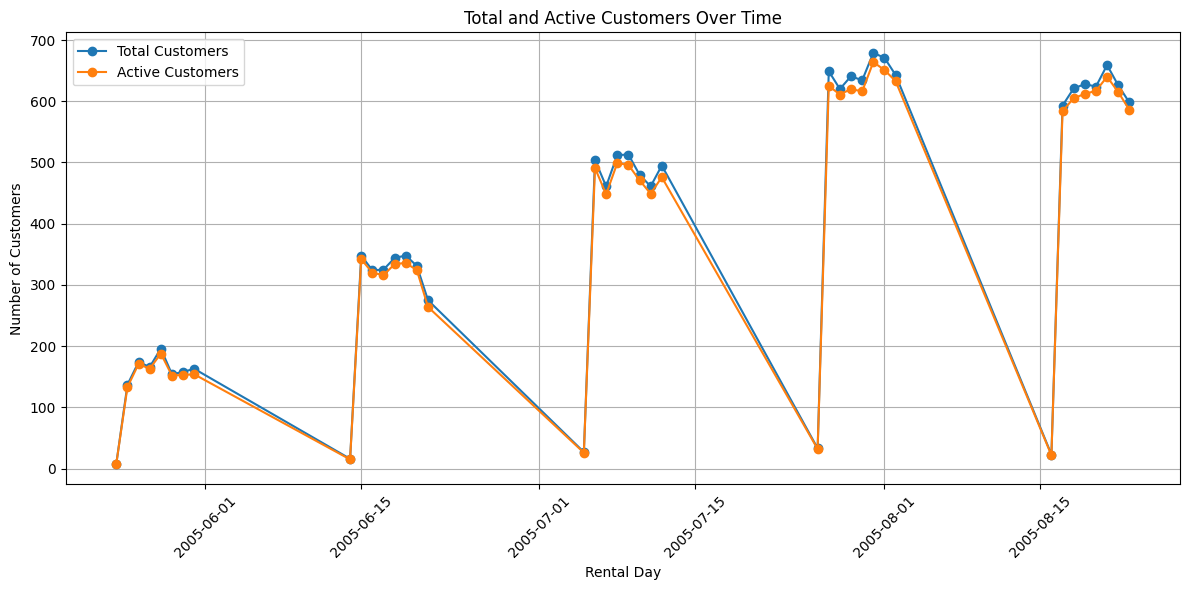

In [127]:
plt.figure(figsize=(12, 6))
plt.plot(df["rental_day"], df["total_customers"], label="Total Customers", marker='o', linestyle='-')
plt.plot(df["rental_day"], df["total_active_customers"], label="Active Customers", marker='o', linestyle='-')
plt.title("Total and Active Customers Over Time")
plt.xlabel("Rental Day")
plt.ylabel("Number of Customers")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The number of customers goes up and down, but it is generally increasing.
- The number of customers who rented at least one movie also goes up and down, but it follows the same trend as the total number of customers.
- Most customers who visited the business rented at least one movie.
- The business is seeing more and more customers, and most of them are renting movies

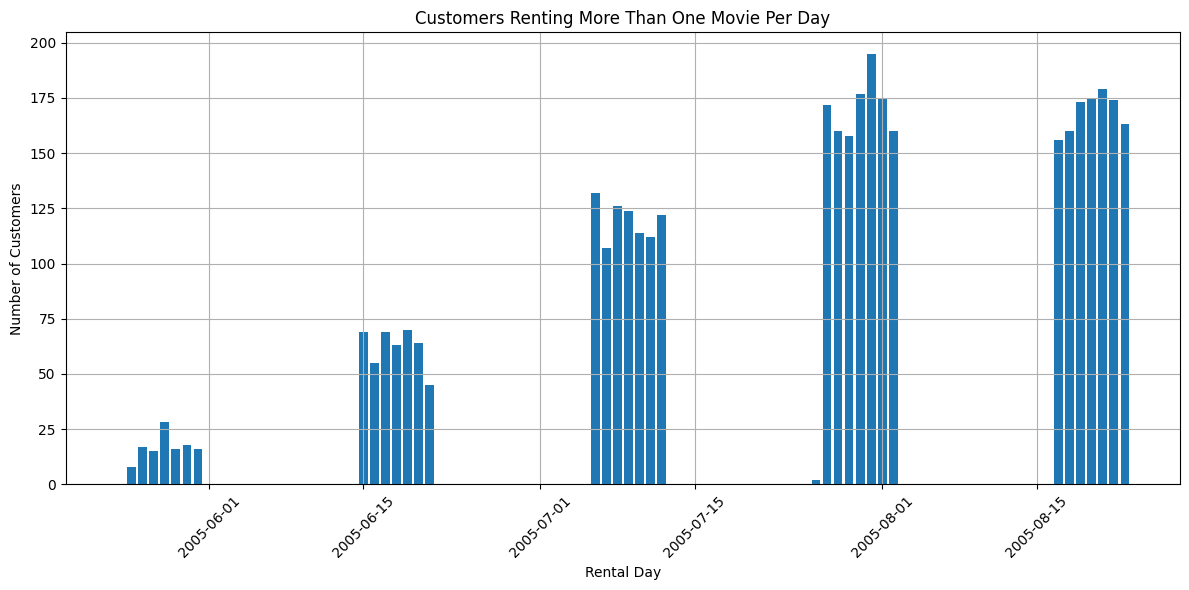

In [128]:
plt.figure(figsize=(12, 6))
plt.bar(df["rental_day"], df["total_customers_renting_more_than_one_movie_per_day"])
plt.title("Customers Renting More Than One Movie Per Day")
plt.xlabel("Rental Day")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The number of customers who rent multiple movies per day changes, with some days having more customers doing this than others.
- Customers renting multiple movies in a day is a good sign. It means they like the movies we offer and want to watch more.
- It also shows they're happy with our service.
- We can use this to create special deals, like discounts for renting several movies at once, to encourage more rentals.

# STAFF PERFORMANCE

In [129]:
db_session = create_connection()
query = """ 
    SELECT
        best_staff_name,
        COUNT(best_staff_name) AS times_as_best_staff_name, 
        SUM(best_staff_rental_count) AS total_rentals
    FROM reporting_schema.aggregate_daily
    GROUP BY
        best_staff_name
    ORDER BY
        times_as_best_staff_name DESC,
        total_rentals DESC; 
"""
df = return_query_as_df(db_session= db_session, query= query)

c:\Users\User\Desktop\SQL_Pandas\W4_2_ETL_Project\ETL_Project\database_handler.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  query_df = pd.read_sql_query(sql= query, con=db_session)


In [130]:
df

,best_staff_name,times_as_best_staff_name,total_rentals
0,Mike Hillyer,25,5139
1,Jon Stephens,15,3036


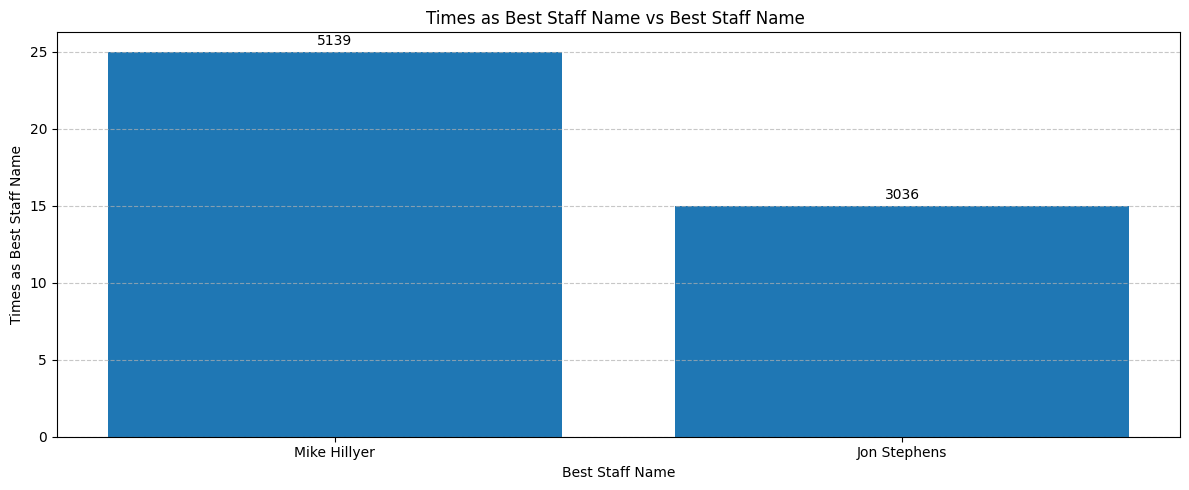

In [131]:
plt.figure(figsize=(12, 5))
plt.bar(df["best_staff_name"], df["times_as_best_staff_name"])
plt.xlabel('Best Staff Name')
plt.ylabel('Times as Best Staff Name')
plt.title('Times as Best Staff Name vs Best Staff Name ')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the total rentals as text above the bars
for i, v in enumerate(df["total_rentals"]):
    plt.text(i, df["times_as_best_staff_name"][i] + 0.25, str(v), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

- "Mike Hillyer" has a higher frequency of being recognized as the "best staff name" and a significantly higher number of total rentals compared to "Jon Stephens." This suggests that "Mike Hillyer" may be a more successful or popular staff member in terms of customer interactions and rental transactions.
- Could imply that "Mike Hillyer" provides exceptional service or has a better rapport with customers, resulting in more rentals.
- Recognize and reward "Mike Hillyer" for his outstanding performance in terms of customer recognition and total rentals. This could include bonuses to motivate and retain high-performing staff.

# CONCLUSION

- Optimize Saturday Operations: Saturdays emerge as the busiest days for DVD rentals. Consider running promotions and special events on Saturdays to maximize revenue. Ensure well-stocked inventory and leverage social media or email marketing for Saturday-specific offers.

- Pricing Strategy: The price range for DVD rentals ($1 to $12) is affordable, making it accessible to a wide audience. You can further encourage rentals by offering weekday discounts and deals, enhancing affordability and attracting more customers.

- Late Returns Analysis: Late returns are more common. Investigate the reasons behind late returns, such as customer habits or operational issues. Implement strategies like clear return policies and reminders to reduce late returns.

- Genre and Category Insights: Identify popular and less popular movie categories. Allocate marketing efforts towards popular categories and optimize inventory accordingly. Consider promotional campaigns for less popular categories and gather customer feedback for improvement.

- Rating Preferences: Recognize that PG-13 movies are the most rented and have the highest market demand. Ensure a diverse selection of PG-13 movies and highlight them in marketing materials.